# Computer Infrastructure Problems

This notebook covers the problems covered in the ATU module Computer Infrastructure.

## Problem 1: Data from yfinance

> Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

> - Facebook (META)
> - Apple (AAPL)
> - Amazon (AMZN)
> - Netflix (NFLX)
> - Google (GOOG)

> The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

First I begin by importing the necessary libraries. For this project I will need yfinance to access the Y!Finance api, datetime for handling dates, and pandas for handling data frames.

In [1]:
# https://ranaroussi.github.io/yfinance/reference/index.html
import yfinance as yf

# https://docs.python.org/3/library/datetime.html
import datetime as dt

# https://pandas.pydata.org/docs/
import pandas as pd

Next, I created a function that downloaded and saved to a CSV file the stock information for the 5 FAANG companies: Meta, Apple, Amazon, Netflix and Google.

When trying to get `with open` to create the file, I used [this nkmk article](https://note.nkmk.me/en/python-file-io-open-with/#create-a-file-only-if-it-doesnt-exist) to understand the mode `x` to create a file, but after some investigation, it was better to use pandas `.to_csv` than to use `with open`.

When trying to get a formatted `datetime` string, I looked at the [datetime documentation](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) to find out how `strftime` should be formatted.

In [2]:
# Create a function to get the data from Yahoo Finance and save it as a CSV file
def get_data():
    # Download historical data for multiple tickers
    data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period="5d", interval="1h")
    # Save the data to a CSV file with a timestamped filename
    # The filename format is YYYYMMDD_HHMMSS.csv
    # References:
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
    # https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
    data.to_csv(f"data/{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}.csv")
    return data

Let's run this function and see what it returns.

In [3]:
# Call the function and display the first few rows of the data
get_data().head()

C:\Users\luxxx\AppData\Local\Temp\ipykernel_41112\531233645.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period="5d", interval="1h")
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-17 14:30:00+00:00  269.279999  230.725006  290.899994  607.400024   
2025-11-17 15:30:00+00:00  267.879913  232.419998  288.450012  606.299988   
2025-11-17 16:30:00+00:00  268.920013  233.520004  289.011810  606.849976   
2025-11-17 17:30:00+00:00  267.779999  232.000000  286.299988  604.450012   
2025-11-17 18:30:00+00:00  267.290009  231.399307  285.619904  600.150024   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-17 14:30:00+00:00  111.029999  270.489990  234.600006  294.500000   
2025-11-17 15:30:00+00:00  110.370003  269.390015  232.500000  291.529999   
2025-11-17 16:30:00+00:00  111.209999  269.549988  233.824997  290.359985   
2025-11-17 17:30:00+00:00  110.594704  269.350006  234.029999  289.160004   
2025-11-17 18:30:00+00:00  109.858200  268.339996  232.770004  287.415009   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-17 14:30:00+00:00  611.690002  111.849998  ...  268.720001   
2025-11-17 15:30:00+00:00  608.479919  111.370003  ...  269.230011   
2025-11-17 16:30:00+00:00  608.820007  111.470001  ...  267.850006   
2025-11-17 17:30:00+00:00  607.330017  111.289902  ...  268.940002   
2025-11-17 18:30:00+00:00  606.400024  110.809998  ...  267.769989   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-17 14:30:00+00:00  232.945007  286.135010  609.034973  110.779999   
2025-11-17 15:30:00+00:00  230.699997  290.899994  607.300110  111.025803   
2025-11-17 16:30:00+00:00  232.449997  288.470490  606.250000  110.369904   
2025-11-17 17:30:00+00:00  233.524399  289.079987  606.799988  111.230003   
2025-11-17 18:30:00+00:00  231.990005  286.290009  604.500000  110.580002   

Price                       Volume                                       
Ticker                        AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                 
2025-11-17 14:30:00+00:00  8509806  11162624  9825496  2585815  4796429  
2025-11-17 15:30:00+00:00  3379761   6793002  2897454  1127617  2212014  
2025-11-17 16:30:00+00:00  2089997   4128759  2043947   848823  1724155  
2025-11-17 17:30:00+00:00  1923442   2375447  1735483  1142893   997802  
2025-11-17 18:30:00+00:00  2030991   2231460  1551909  1256188  1393752  

[5 rows x 25 columns]

It returns a pandas data frame. I have already saved it to a CSV file so I can now open one of these files and view its contents.

In [4]:
# I can now open one of these files and view its contents.
with open ("data/20251006_220432.csv", 'r') as f:
    print(f.read(500))

Price,Close,Close,Close,Close,Close,High,High,High,High,High,Low,Low,Low,Low,Low,Open,Open,Open,Open,Open,Volume,Volume,Volume,Volume,Volume
Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2025-09-30 13:30:00+00:00,254.88619995117188,218.91000366210938,240.52499389648438,729.1849975585938,1183.02001953125,255.91900634765625,222.0800018310547,243.0,740.4749755859375,1204.300048828


It looks like there are two header rows and an index row. I will have to ammend the header keyword argument to accomodate the multi-headers. The header rows are at index 0 and 1.

In [5]:
# Now I will read the CSV file into a pandas DataFrame
# I will use the header and index_col arguments to properly format the DataFrame
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/p
data = pd.read_csv("data/20251006_220432.csv", header=[0, 1], index_col=0, parse_dates=True)
data.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-09-30 13:30:00+00:00  254.886200  218.910004  240.524994  729.184998   
2025-09-30 14:30:00+00:00  254.220001  218.744995  240.229996  732.609985   
2025-09-30 15:30:00+00:00  254.535095  219.330002  241.839996  734.190002   
2025-09-30 16:30:00+00:00  253.735001  219.259995  241.570007  728.349976   
2025-09-30 17:30:00+00:00  253.339996  219.249496  241.690002  731.000000   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-09-30 13:30:00+00:00  1183.020020  255.919006  222.080002  243.000000   
2025-09-30 14:30:00+00:00  1188.250000  255.675003  219.740005  242.009995   
2025-09-30 15:30:00+00:00  1188.724976  254.970001  219.539993  242.229996   
2025-09-30 16:30:00+00:00  1186.150024  254.669998  219.539993  242.440002   
2025-09-30 17:30:00+00:00  1191.665039  253.990005  219.309998  242.020004   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-09-30 13:30:00+00:00  740.474976  1204.300049  ...  255.000000   
2025-09-30 14:30:00+00:00  735.409912  1190.369995  ...  254.910004   
2025-09-30 15:30:00+00:00  735.679993  1192.849976  ...  254.210007   
2025-09-30 16:30:00+00:00  734.419983  1190.859863  ...  254.550598   
2025-09-30 17:30:00+00:00  732.770020  1192.719971  ...  253.759995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-09-30 13:30:00+00:00  222.000000  243.000000  740.000000  1204.000000   
2025-09-30 14:30:00+00:00  218.910004  240.539993  729.140015  1182.970947   
2025-09-30 15:30:00+00:00  218.735001  240.220001  732.440002  1188.420044   
2025-09-30 16:30:00+00:00  219.330002  241.869995  734.262512  1188.969971   
2025-09-30 17:30:00+00:00  219.250000  241.559998  728.250000  1185.720093   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-09-30 13:30:00+00:00  5093340  8368186  4050751  2579030  800232  
2025-09-30 14:30:00+00:00  2465164  3893057  1612529  1134276  253120  
2025-09-30 15:30:00+00:00  1531480  2497936  1214548   860168  139930  
2025-09-30 16:30:00+00:00  1623333  2002183  1006183   729726  165099  
2025-09-30 17:30:00+00:00  1664288  1935636   725820   586561  123599  

[5 rows x 25 columns]

I have successfully downloaded the data, saved it as a CSV file with the appropriate name in the appropriate folder in the repository and imported the information from the file back into a readable dataframe. 

## Problem 2: Plotting Data

> Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`. Create the `plots` folder if you don't already have one.

Here I import the necessary modules for the next problem. Glob to help read file systems, os to read file info and matplotlib to create figures to represent the data.

In [6]:
# Glob is a module that finds all the pathnames matching a specified pattern
import glob

# OS module provides a way of using operating system dependent functionality
import os

# Matplotlib is a plotting library for the Python programming language
import matplotlib.pyplot as plt

To open the latest file in a folder I found [this stack overflow question](https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder) that mentions a method of making a list of the file and taking the max of that list according to the creation time of the files. 

In [7]:
# Get a list of all CSV files in the data directory
list_of_files = glob.glob('data/*.csv')
# Find the latest CSV file in the data directory sorting by creation time
latest_file = max(list_of_files, key=os.path.getctime)

# Read the latest CSV file into a pandas DataFrame
# Using header and index_col arguments to properly format the DataFrame
# Reference:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
data = pd.read_csv(latest_file, header=[0, 1], index_col=0, parse_dates=True)
data.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-17 14:30:00+00:00  269.279999  230.725006  290.899994  607.400024   
2025-11-17 15:30:00+00:00  267.879913  232.419998  288.450012  606.299988   
2025-11-17 16:30:00+00:00  268.920013  233.520004  289.011810  606.849976   
2025-11-17 17:30:00+00:00  267.779999  232.000000  286.299988  604.450012   
2025-11-17 18:30:00+00:00  267.290009  231.399307  285.619904  600.150024   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-17 14:30:00+00:00  111.029999  270.489990  234.600006  294.500000   
2025-11-17 15:30:00+00:00  110.370003  269.390015  232.500000  291.529999   
2025-11-17 16:30:00+00:00  111.209999  269.549988  233.824997  290.359985   
2025-11-17 17:30:00+00:00  110.594704  269.350006  234.029999  289.160004   
2025-11-17 18:30:00+00:00  109.858200  268.339996  232.770004  287.415009   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-17 14:30:00+00:00  611.690002  111.849998  ...  268.720001   
2025-11-17 15:30:00+00:00  608.479919  111.370003  ...  269.230011   
2025-11-17 16:30:00+00:00  608.820007  111.470001  ...  267.850006   
2025-11-17 17:30:00+00:00  607.330017  111.289902  ...  268.940002   
2025-11-17 18:30:00+00:00  606.400024  110.809998  ...  267.769989   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-17 14:30:00+00:00  232.945007  286.135010  609.034973  110.779999   
2025-11-17 15:30:00+00:00  230.699997  290.899994  607.300110  111.025803   
2025-11-17 16:30:00+00:00  232.449997  288.470490  606.250000  110.369904   
2025-11-17 17:30:00+00:00  233.524399  289.079987  606.799988  111.230003   
2025-11-17 18:30:00+00:00  231.990005  286.290009  604.500000  110.580002   

Price                       Volume                                       
Ticker                        AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                 
2025-11-17 14:30:00+00:00  8509806  11162624  9825496  2585815  4796429  
2025-11-17 15:30:00+00:00  3379761   6793002  2897454  1127617  2212014  
2025-11-17 16:30:00+00:00  2089997   4128759  2043947   848823  1724155  
2025-11-17 17:30:00+00:00  1923442   2375447  1735483  1142893   997802  
2025-11-17 18:30:00+00:00  2030991   2231460  1551909  1256188  1393752  

[5 rows x 25 columns]

In order to make the xticks legible I consulted [this stackoverflow question](https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels) that suggested using `plt.xticks(rotation=90)` to get the desired effect. I modified the code from the resource and have implemented my own version of it, using `rotation=20`.

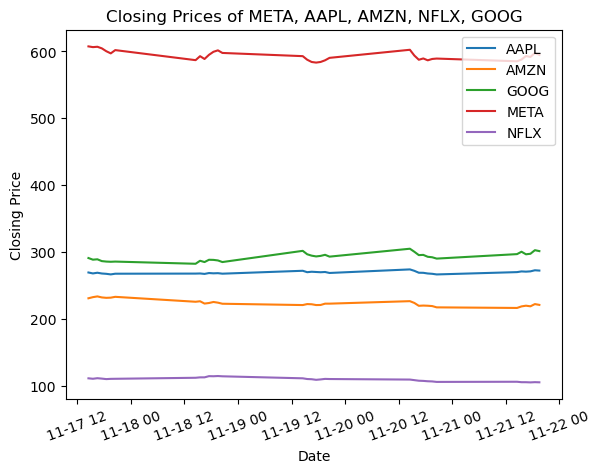

In [8]:
# Plot the closing prices of the stocks
plt.plot(data['Close'])

# Add labels and title to the plot
plt.title('Closing Prices of META, AAPL, AMZN, NFLX, GOOG')

# Add a legend, rotate x-axis labels, and show the plot
plt.legend(data['Close'].columns)
plt.xticks(rotation=20)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Close the plot to free up memory
plt.close()


In the next section I create a function that will perform the above task in one call.

I used [this stack overflow question](https://stackoverflow.com/questions/35089369/python-split-function-to-read-a-string-between-two-forward-slashes) to help impliment the `split` method to extract the file name from the file path. 

When researching how to strip a filename of an extension I found [this stack overflow question](https://stackoverflow.com/questions/3548673/how-can-i-replace-or-strip-an-extension-from-a-filename-in-python) that suggested using `os.path.splitext`. I ammended the implimentation to suit my needs in this case.

I also found [this stack overflow question](https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it) that explained how to save a pandas plot as a png file.

In [9]:
# Create a function to plot the data from the latest CSV file

def plot_data():
    list_of_files = glob.glob('data/*.csv')
    latest_file = max(list_of_files, key=os.path.getctime)
    data = pd.read_csv(latest_file, header=[0, 1], index_col=0, parse_dates=True)
    fig = data.plot(y='Close',
                    title='FAANG Stock Prices Over the Last 5 Days',
                    xlabel='Date',
                    ylabel='Closing Price',
                    rot=20,
                    legend=True)
    fig.figure.savefig(f"plots/{os.path.splitext(latest_file.split('\\')[-1])[0]}.png", dpi=300)
    

I can now call the function to perform all of these tasks.

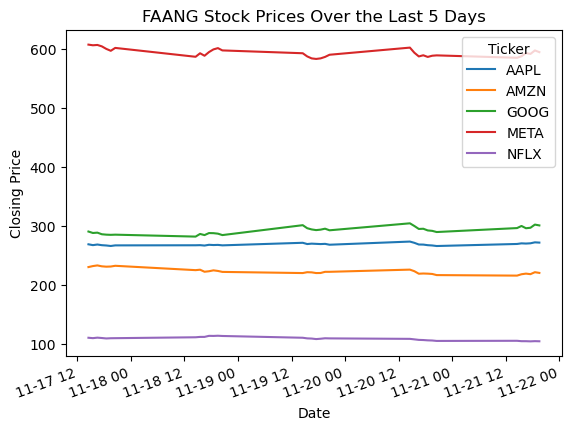

In [10]:
plot_data()

## Problem 3: Script

> Create a Python script called `faang.py` in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

To create the script called `faang.py` in the root of my repository, I moved the functions created above into the script and called the functions. I then added the shebang `#! /usr/bin/env python` to the first line of the script. Since I am using windows, I then went into codespaces to access the linux terminal and changed the permissions for the file to be executable by using `chmod +x ./faang.py`. This allowed the file to be run independently as an executable and can be run using `./faang.py` in codespaces or a linux terminal.

## Problem 4: Automation

> Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning. The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

For this problem I created the folder `.github/workflows/` in the root of my repository and used both the github actions demo and the [GitHub actions documentation](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#jobs) to create a yml file called `faang.yml` that tells GitHub to trigger the workflow every Saturday at 11:00am and that workflow runs the `faang.py` file in the root of my repository which then downloads my data and creates the appropriate graphs associated with that data.

`name: Production of FAANG Report`

The first line just provides a name for the script. This is used by GitHub to display the actions on the repository.

`run-name: ${{ github.actor }} is creating FAANG Report`

This is the run-name for the script that gets displayed in the workflow runs on the repository actions tab. It includes a variable that declares the GitHub actor that ran the workflow.

`on:`

This line opens the section relating to when the workflow should be triggered. Following are the events that would trigger the script to run.

  `schedule:`

The `schedule` event allows you to trigger a workflow at a scheduled time.

  `- cron: '0 11 * * 6'  # At 11:00 AM every Saturday`

This specifies the exact time I would like the workflow to be triggered.

Cron syntax has five fields separated by a space, and each field represents a unit of time.

[minute (0 - 59)] [hour (0 - 23)] [day of the month (1 - 31)] [month (1 - 12 or JAN-DEC)] [day of the week (0 - 6 or SUN-SAT)]

This particular cron calls for the workflow to be triggered at 11:00am every Saturday.

`jobs:`

Next comes the actions that the triggered workflow will take at the scheduled time. The `jobs:` line denotes the section in which you can find the actions.

`  Create_FAANG_Report:`

 The first job is called `Create_FAANG_Report:`. This is used as a unique identifier for the job and is a map of the job's configuration data.

`    name: Create FAANG Report`

It is given a name that will be displayed in the GitHub UI.

`    runs-on: ubuntu-latest`

This defines the the type of machine the job is to be run on.

`    steps:`

A job contains a sequence of tasks to be run called steps. These are defined individually and will be run in sequence. Each step runs as its own process in the runner environment.

`      - name: Checkout Repository`

You can specify a name for the command run by the workflow. In this case the name 'Checkout Repository' has been chosen for the following run command.

`uses: actions/checkout@v4`

`uses` specifies the location and version of a reusable workflow file to run as a job. This calls the `checkout@v4` workflow which checks out our repository so that the files in the repository are accessable. This is running version 4. 

`      - name: Set up Python`

Here another name is specified for the following task.

`        uses: actions/setup-python@v3`

In this case the `setup-python@v3` workflow is being called. This will setup python on the runner.

`        with:`

This provides a map of inputs that are passed to the called workflow. The next line of code is passed to the `setup-python@v3` call.

`          python-version: '3.x'`

This input is passed to the workflow called above as per the `with:`.

`      - name: Install Dependencies`

Again a name is specified.

`        run: |`

Runs the following command-line programs using the operating systems's shell. If a name is not specified, it will use the text specified in the run command. A pipe symbol is included at the end which indicates the code runs on to the next line.

`          python -m pip install --upgrade pip`

Here pip is installed and upgraded.

`          pip install -r requirements.txt`

Here the dependencies in the requirements.txt are installed so that our script can be run later on.


`      - run: |`

As above.

`        echo "Starting FAANG Report Generation"`

Print "Starting FAANG Report Generation".

`- name: FAANG Report Generation`

Here the following task has been assigned the name "FAANG Report Generation". This will appear in the GitHub actions UI later.

`        run: |`

Same as above.

`./faang.py`

This will run the script in the root of the repository which downloads the data and creates the appropriate graphs from the freshly downloaded data.

`- run: |`

Same as above.

`echo "FAANG Report Generated Successfully"`

Print "FAANG Report Generated Successfully".


`      - name: Commit and Push Changes`

As above, specifying a name for the following step.

`run: |`

As above.

`          git add .`

Since the action earlier action is persisted in the local git config, we can run git commands to add, commit and push files to our repository. This adds all files in the folder to our push.

`          git commit -m "Automated FAANG Report Update"`

This commits the changes with the message: "Automated FAANG Report Update".

`          git push origin HEAD:main`

This pushes the changes to the repository.

`      - run: |`

As above.

`          echo "FAANG Report Changes Pushed Successfully"`

A final message to say everything has completed.

## End